In [34]:
import seaborn as sns
import pybedtools
import statistics as stat
import math
import pandas as pd
from Bio import SeqIO
from Bio.SeqUtils import GC
import pybiomart

In [35]:
import os
from distance_extraction import find_distances

dataset_list = os.listdir("data/biomart_data/")
total_df = pd.read_pickle("data/labelled_iaps.pkl")
total_df.sort_values(["chrom", "start"])

path = "data/clean_beds/"
interval_bed = pybedtools.BedTool(path + "mm10.IAP.mended.extent" + ".bed")
features_dataset = interval_bed.to_dataframe()

i = 1
for filename in dataset_list:
    if i % 20 == 0:
        print(str(i) + " datasets processed.")
    i += 1
    feature_id = filename[:-4] + "_distance"
    dataset = pd.read_pickle("data/biomart_data/" + filename)
    dataset["chromosome_name"] = ["chr" + str(x) for x in list(dataset["chromosome_name"])]
    dataset_bed = pybedtools.BedTool.from_dataframe(dataset)
    distances_df = find_distances(interval_bed, dataset_bed, feature_id)
    distances_df.sort_values(["chrom", "start"])
    distances_df.index = total_df["element_id"].astype(int).to_list()
    total_df[feature_id] = distances_df[feature_id]

total_df

20 datasets processed.
40 datasets processed.
60 datasets processed.
80 datasets processed.
100 datasets processed.
120 datasets processed.
140 datasets processed.
160 datasets processed.
180 datasets processed.
200 datasets processed.


,chrom,start,end,element_id,length,strand,val_result,Promoter_limb_E14.5_distance,CTCF_Binding_Site_liver_E13.5_distance,Enhancer_heart_E12.5_distance,...,CTCF_Binding_Site_ES-Bruce4_E_distance,Enhancer_MEL_cell_line_distance,Promoter_embryonic_facial_prominence_E14.5_distance,Promoter_forebrain_E14.5_distance,CTCF_Binding_Site_stomach_E14.5_distance,Promoter_hindbrain_E13.5_distance,Enhancer_midbrain_E16.5_distance,CTCF_Binding_Site_heart_P0_distance,Promoter_heart_E14.5_distance,CTCF_Binding_Site_midbrain_E12.5_distance
151177,chr1,95057294,95057326,151177,33,-,untested,499892,-18359,87092,...,-18359,87092,499892,499892,-18359,499892,87092,-18359,499892,-18359
25136,chr1,20055335,20055371,25136,37,-,untested,383451,-29293,-21093,...,-29293,-21093,383451,383451,-29293,383451,-21093,-29293,383451,-29293
159399,chr1,100567693,100567739,159399,47,+,untested,-325036,104842,-3237,...,104842,-3237,-325036,-325036,104842,-325036,-3237,104842,-325036,104842
160006,chr1,100931364,100931413,160006,50,+,untested,360285,10086,-137580,...,10086,-137580,360285,360285,10086,360285,-137580,10086,360285,10086
91370,chr1,60586644,60586694,91370,51,-,untested,-59187,0,54205,...,0,54205,-59187,-59187,0,-59187,54205,0,-59187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4180871,chr9,92734665,92742098,4180871,7434,-,untested,17591,23392,8192,...,23392,8192,17591,17591,23392,17591,8192,23392,17591,23392
4041241,chr9,19763109,19770697,4041241,7589,-,untested,-15364,7295,14295,...,7295,14295,-15364,-15364,7295,-15364,14295,7295,-15364,7295
4069873,chr9,36157171,36165366,4069873,8196,+,untested,-111569,4412,-10570,...,4412,-10570,-111569,-111569,4412,-111569,-10570,4412,-111569,4412
4041384,chr9,19897067,19906574,4041384,9508,+,untested,43746,-2889,66347,...,-2889,66347,43746,43746,-2889,43746,66347,-2889,43746,-2889


In [36]:
import umap

reducer = umap.UMAP()
embedding = reducer.fit_transform(total_df.iloc[:, 8:])
embedding.shape

/Users/omar/Documents/GitHub/VMIAP/venv/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "venv/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


(8059, 2)

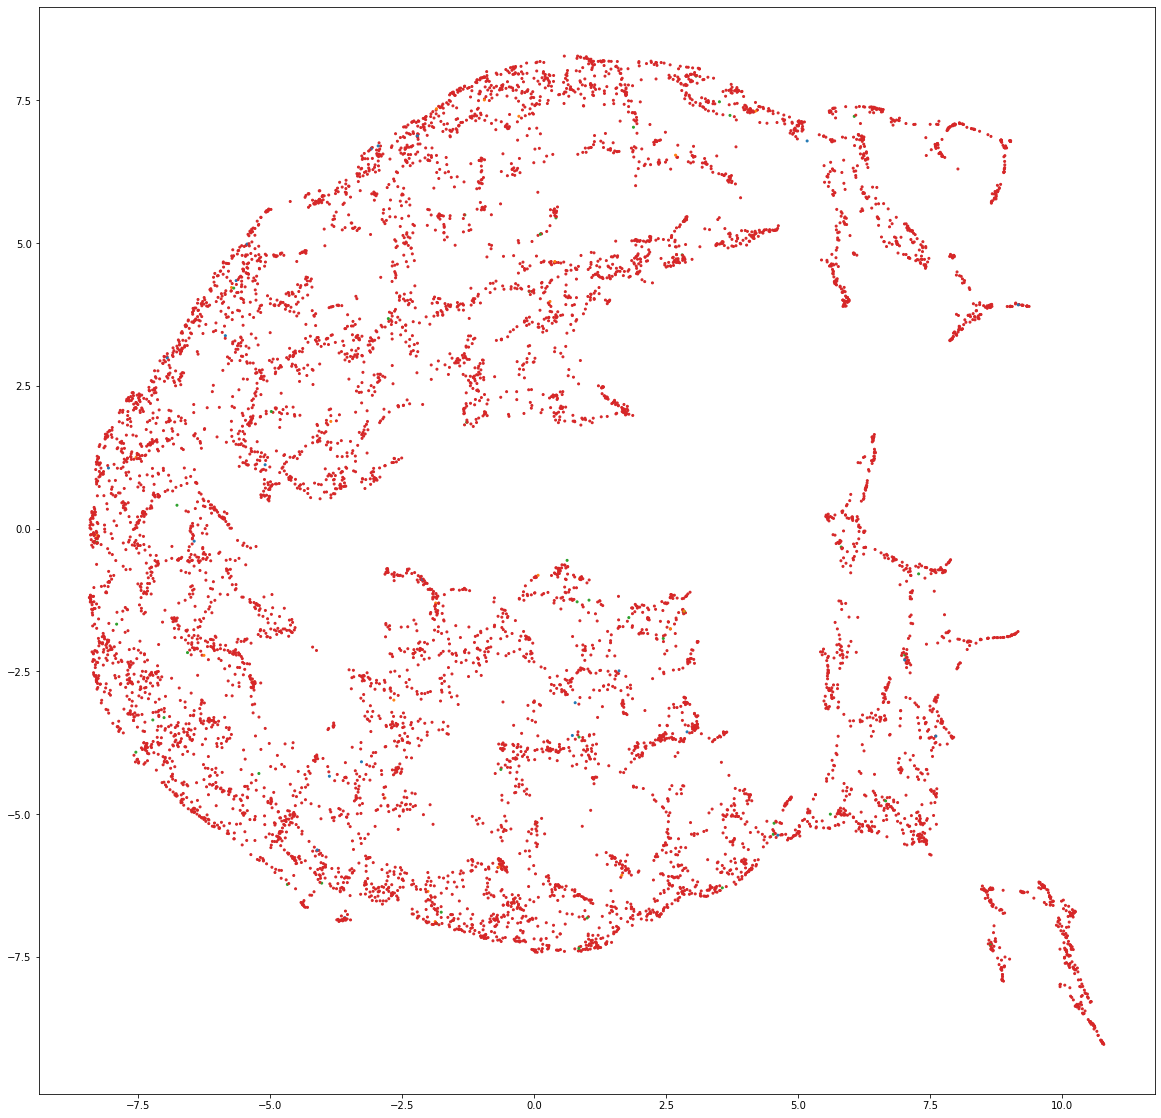

In [37]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 20]
total_df["val_result"] = total_df["val_result"].astype('category')
plt.scatter(embedding[:, 0], embedding[:, 1],
    c=[sns.color_palette()[x] for x in total_df["val_result"].cat.codes], s=4)

In [48]:
val_df = total_df[total_df.val_result != "untested"]
val_df["val_result"] = val_df["val_result"].astype('category')
val_reducer = umap.UMAP()
val_reducer = val_reducer.fit(val_df.iloc[:, 8:], y=val_df["val_result"].cat.codes)
val_embeddings = val_reducer.transform(val_df.iloc[:, 8:])
total_embeddings = val_reducer.transform(total_df.iloc[:, 8:])

/Users/omar/Documents/GitHub/VMIAP/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


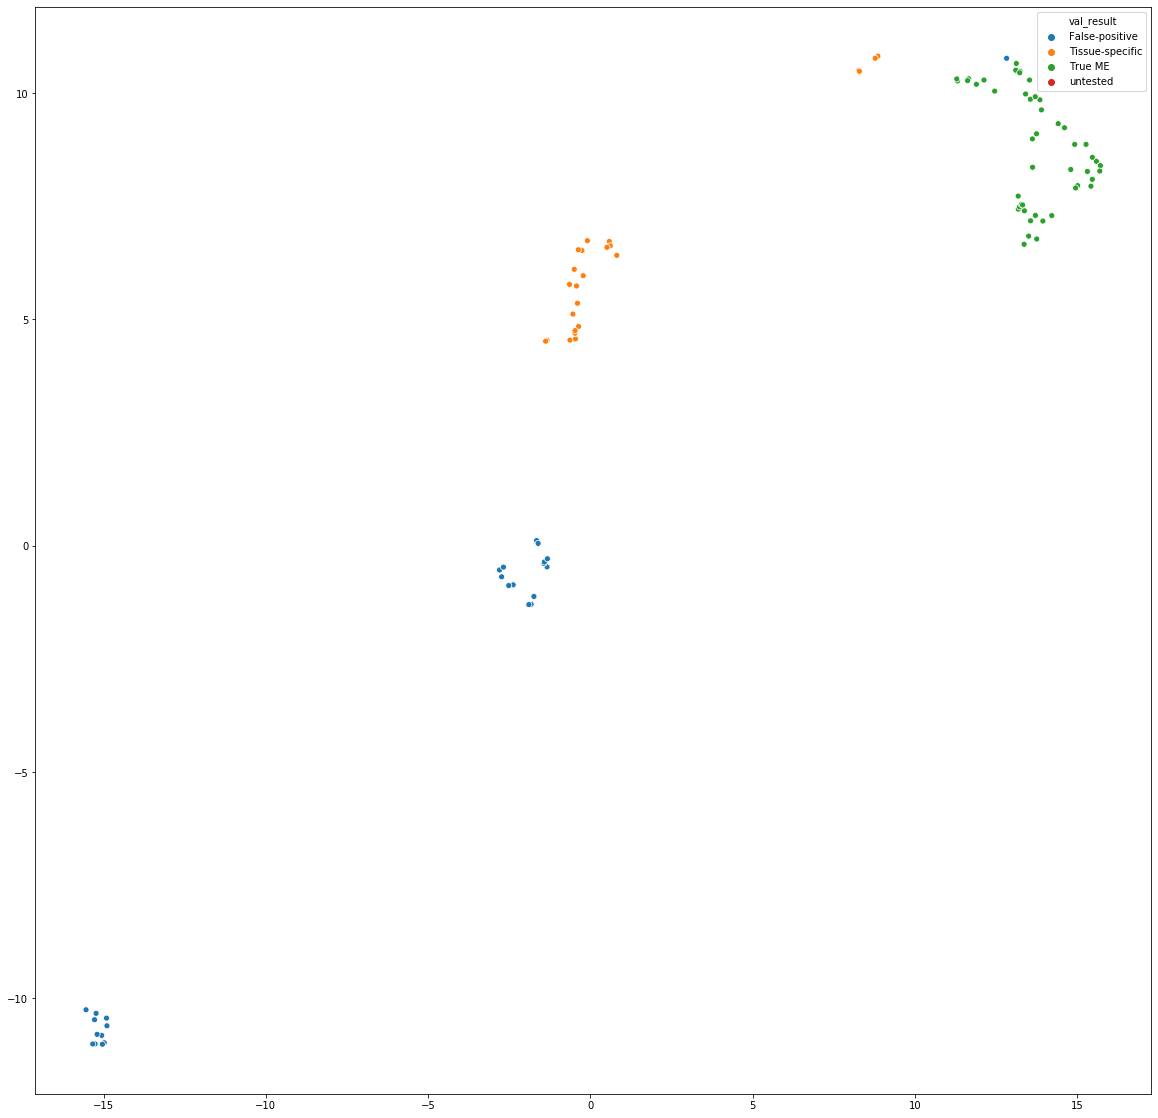

In [49]:
sns.scatterplot(val_embeddings[:, 0], val_embeddings[:, 1], hue=val_df["val_result"])

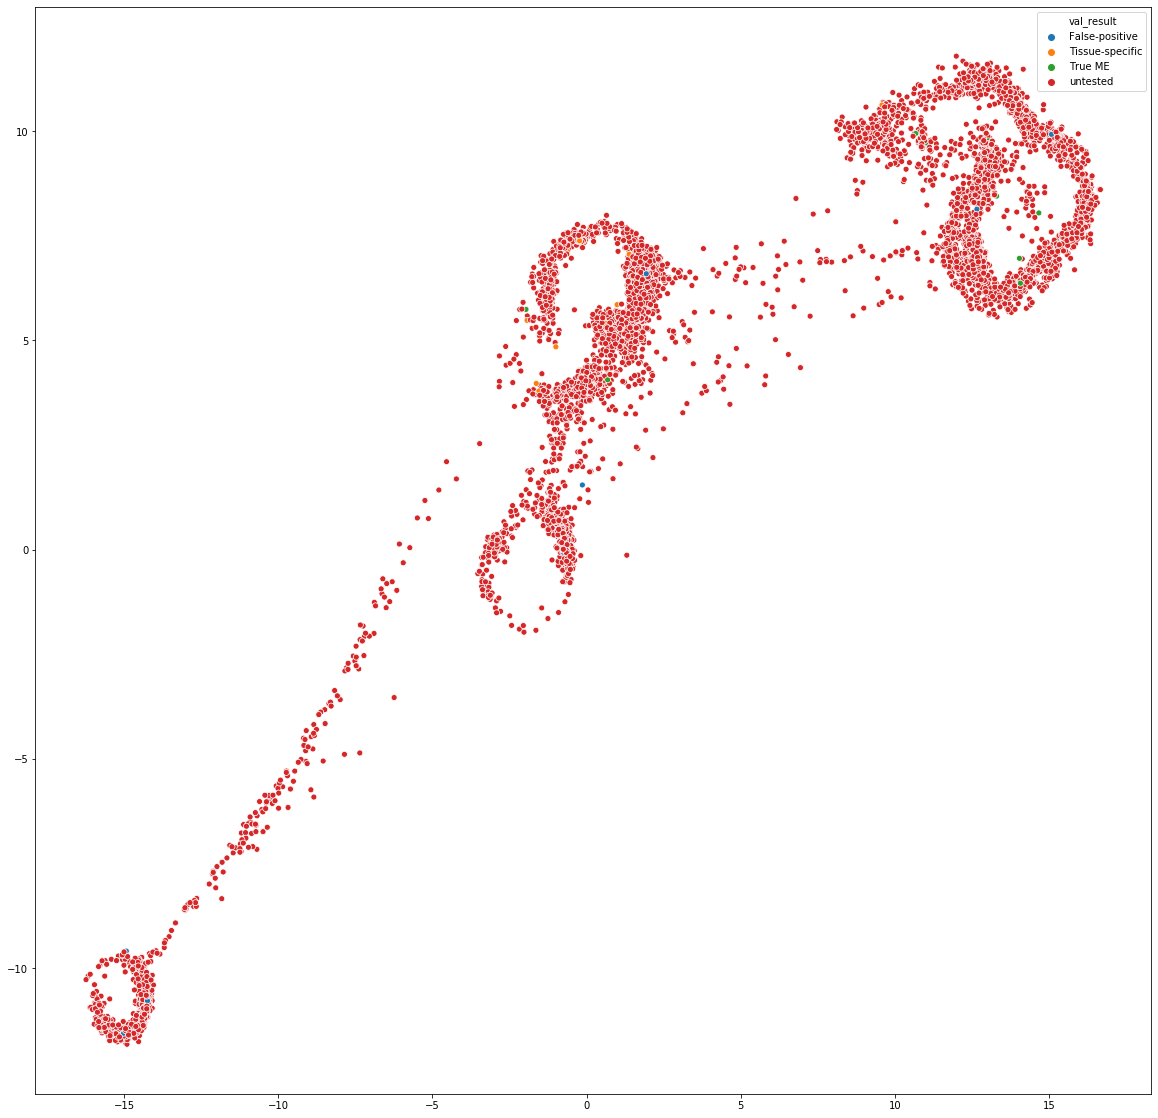

In [52]:
sns.scatterplot(total_embeddings[:, 0], total_embeddings[:, 1], hue=total_df["val_result"])

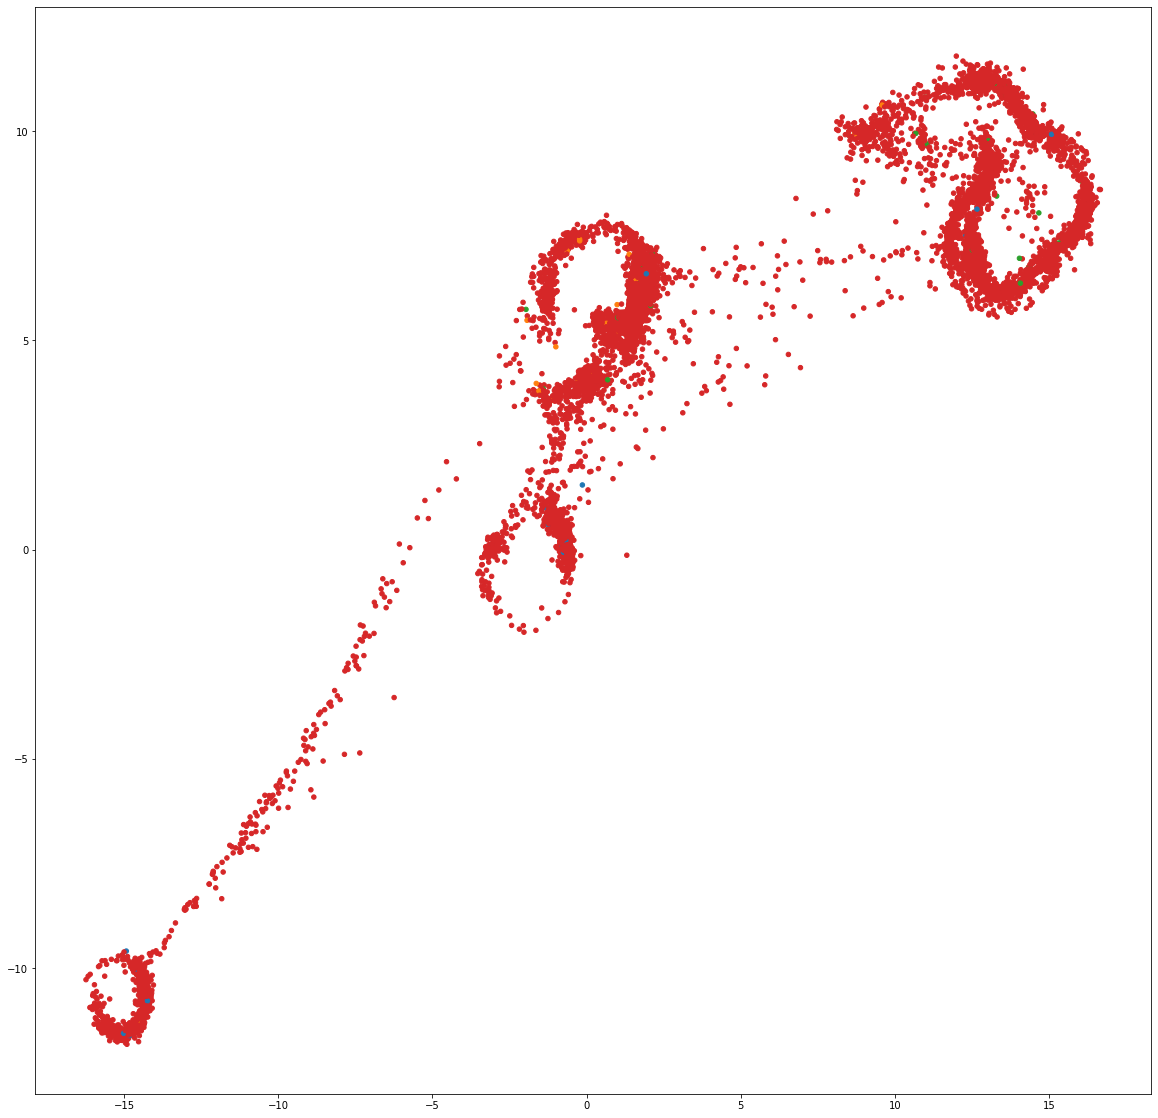

In [50]:
plt.scatter(total_embeddings[:, 0], total_embeddings[:, 1],
    c=[sns.color_palette()[x] for x in total_df["val_result"].cat.codes], s=20)